In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
import matplotlib.colors as colors
import sep
from matplotlib import rcParams

rcParams['figure.figsize'] = [11., 11.]

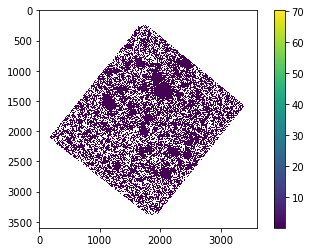

In [3]:
f125w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
norm = colors.LogNorm(vmin = f125w.min(), vmax = f125w.max())
mask = f125w <=0
f125w[mask] = np.nan
plt.imshow(f125w)
plt.colorbar()

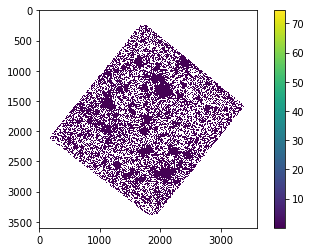

In [4]:
f105w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
norm = colors.LogNorm(vmin = f105w.min(), vmax = f105w.max())
mask = f105w <=0
f105w[mask] = np.nan
plt.imshow(f105w)
plt.colorbar()

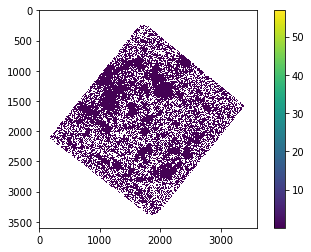

In [5]:
f160w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")
norm = colors.LogNorm(vmin = f160w.min(), vmax = f160w.max())
mask = f160w <=0
f160w[mask] = np.nan
plt.imshow(f160w)
plt.colorbar()

In [9]:
f125w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
f125w = f125w.byteswap(inplace=True).newbyteorder()
f125w = np.max(f125w)-np.min(f125w)
f125w = np.log(f125w)

f160w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")
f160w = f160w.byteswap(inplace=True).newbyteorder()
f160w = np.max(f160w)-np.min(f160w)
f160w = np.log(f160w)

f105w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
f105w = f105w.byteswap(inplace=True).newbyteorder()
f105w = np.max(f105w)-np.min(f105w)
f105w = np.log(f105w)

TypeError: Invalid dimensions for image data

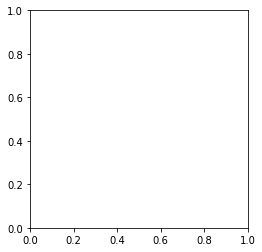

In [14]:
plt.imshow((np.abs(np.stack([f125w,f160w,f105w]).transpose()))**(0.1),origin='lower', interpolation='nearest')
plt.show()
plt.clf()

data_RGB=np.zeros((f125w.shape[0],f125w.shape[1],3),dtype=float)
data_RGB[:,:,0]=f125w 
data_RGB[:,:,1]=f160w
data_RGB[:,:,2]=f105w

plt.savefig("RGB.png")